## Start of working

In [51]:
# Import required libraries
import pandas as pd  # Import the pandas library for data manipulation and analysis.
import matplotlib.pyplot as plt  # Import matplotlib for creating static, animated, and interactive visualizations.
import seaborn as sns  # Import seaborn for statistical data visualization built on top of matplotlib.

In [52]:
# Read the CSV file containing attack log data into a pandas DataFrame
# The 'names' parameter specifies the column names for the DataFrame.
df = pd.read_csv('attack_log.csv', names=['IP', 'Attack_Type', 'Country', 'Bytes', 'Timestamp'])

In [53]:
# Display the first 5 rows of the DataFrame to get an overview of the data.
df.head()

,IP,Attack_Type,Country,Bytes,Timestamp
0,203.115.104.143,syn_flood,India,54,2024-10-17 16:04:21
1,158.177.192.113,syn_flood,The Netherlands,54,2024-10-17 16:04:22
2,12.199.229.205,syn_flood,United States,54,2024-10-17 16:04:22
3,209.213.35.49,syn_flood,United States,54,2024-10-17 16:04:22
4,37.210.169.223,syn_flood,Qatar,54,2024-10-17 16:04:22


## Q1. Where are the suspect IP addresses located?

In [54]:
# Get the unique values from the 'Country' column to see all the distinct countries present in the dataset.
pd.unique(df['Country'])

array(['India', 'The Netherlands', 'United States', 'Qatar', 'Germany',
       'China', 'Spain', 'United Kingdom', 'Canada', 'Croatia', 'Hidden',
       'Japan', 'Denmark', 'South Korea', 'Saudi Arabia', 'Singapore',
       'Colombia', 'Ukraine'], dtype=object)

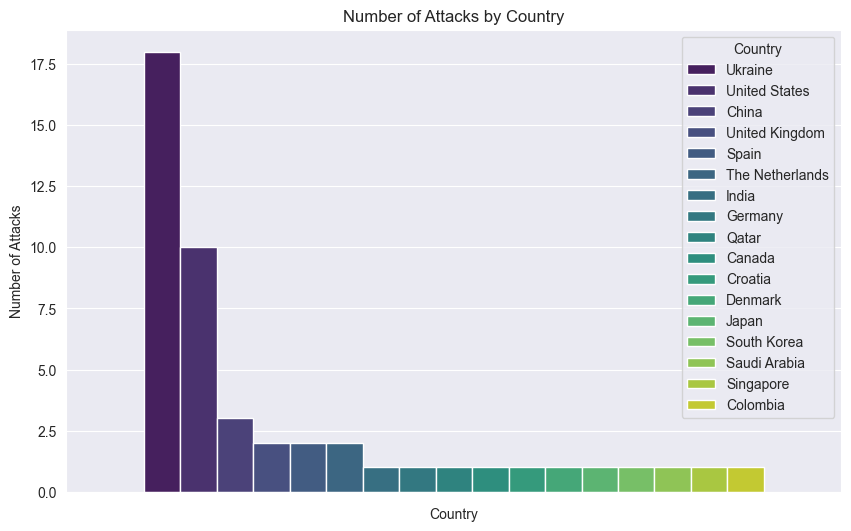

In [55]:
# Count the number of attacks per country, excluding 'Hidden' (Unknown or not valid IP), using value_counts() to aggregate the data.
country_counts = df[df['Country'] != 'Hidden']['Country'].value_counts()

# Create a bar plot to visualize the number of attacks per country.
plt.figure(figsize=(10, 6))  # Set the figure size for better visibility.
sns.barplot(hue=country_counts.index, y=country_counts.values, palette='viridis')  # Use seaborn's barplot for visualization.

# Set the title and labels for the plot.
plt.title('Number of Attacks by Country')  # Title of the plot.
plt.xlabel('Country')  # Label for the x-axis.
plt.ylabel('Number of Attacks')  # Label for the y-axis.
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability.
plt.show()  # Display the plot.

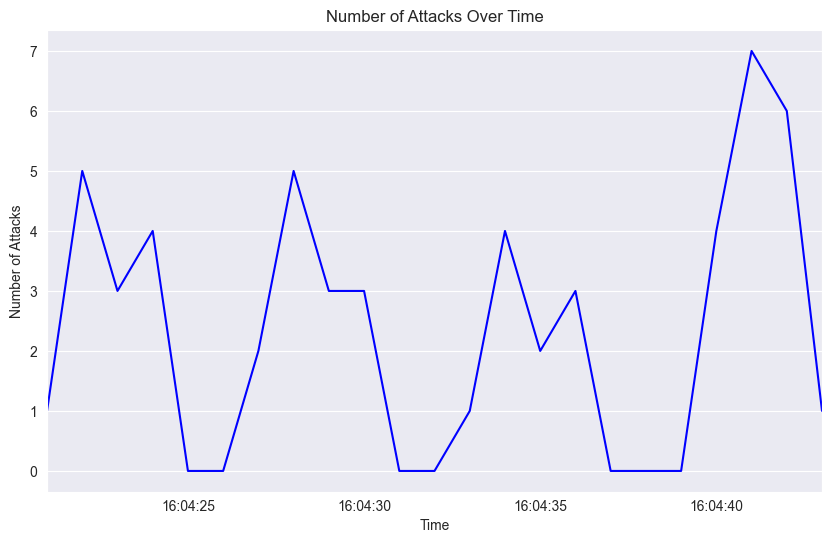

In [56]:
# Create a copy of the DataFrame to avoid modifying the original data.
df_time = df.copy()

# Convert the 'Timestamp' column to datetime format for time series analysis.
df_time['Timestamp'] = pd.to_datetime(df_time['Timestamp'])

# Set the 'Timestamp' column as the index of the DataFrame to facilitate time-based operations.
df_time.set_index('Timestamp', inplace=True)

# Resample the data to get the number of attacks per second.
attacks_per_second = df_time.resample('s').size()

# Plot the number of attacks over time.
plt.figure(figsize=(10, 6))  # Set the figure size for better visibility.
attacks_per_second.plot(kind='line', color='blue')  # Create a line plot of attacks over time.

# Set the title and labels for the plot.
plt.title('Number of Attacks Over Time')  # Title of the plot.
plt.xlabel('Time')  # Label for the x-axis.
plt.ylabel('Number of Attacks')  # Label for the y-axis.
plt.grid(True)  # Enable grid for better readability.
plt.show()  # Display the plot.

## Q2. What is the attack that generated more packets?

In [57]:
# Count the occurrences of each attack type in the DataFrame.
attack_counts = df['Attack_Type'].value_counts()

# Display the count of each attack type.
attack_counts

Attack_Type
smurf        18
syn_flood    13
syn_ack      13
pod          10
Name: count, dtype: int64

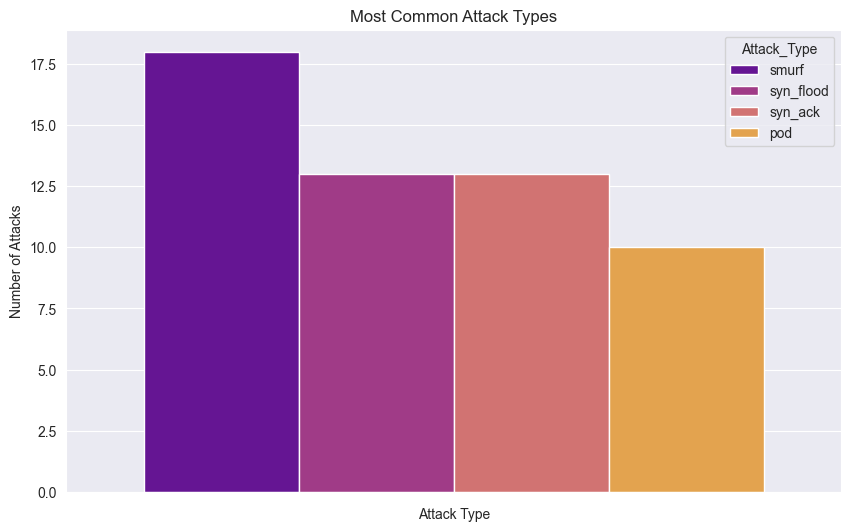

In [58]:
# Create a figure with specified size for the plot.
plt.figure(figsize=(10, 6))

# Create a bar plot using Seaborn to visualize the number of attacks per attack type.
# Set the hue to differentiate the bars by attack type.
sns.barplot(hue=attack_counts.index, y=attack_counts.values, palette='plasma')

# Set the title of the plot.
plt.title('Most Common Attack Types')
plt.xlabel('Attack Type')   # Label the x-axis.
plt.ylabel('Number of Attacks') # Label the y-axis.
plt.xticks(rotation=45) # Rotate the x-axis tick labels for better visibility.
plt.show()  # Display the plot.

## Q3. What is the attack that generated the largest traffic in terms of bytes? And in bytes per second?

In [66]:
# Convert the 'Timestamp' column to datetime format for easier manipulation and analysis.
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Group the DataFrame by 'IP Address' and 'Attack Type'.
# For each group, sum the 'Bytes' to get the total traffic associated with each IP and attack type.
total_traffic = df.groupby(['IP', 'Attack_Type'])['Bytes'].sum().reset_index()

# Display the resulting DataFrame with total traffic for each IP and attack type.
total_traffic

,IP,Attack_Type,Bytes
0,116.51.83.224,pod,1042
1,12.199.229.205,syn_flood,54
2,121.201.220.204,pod,1042
3,133.194.249.36,syn_ack,54
4,134.32.124.85,syn_ack,54
5,140.27.156.122,syn_flood,54
6,143.48.244.110,syn_flood,54
7,158.177.192.113,syn_flood,54
8,164.199.107.43,pod,1042
9,180.78.46.140,syn_ack,54


In [60]:
# Locate the maximum value in the 'Bytes' column.
max_traffic_value = total_traffic['Bytes'].max()

# Filter the DataFrame to get all rows with the maximum traffic
max_traffic_attacks = total_traffic[total_traffic['Bytes'] == max_traffic_value]

# Print the details of the attack with the largest traffic.
print("Attack with largest traffic:")
max_traffic_attacks

Attack with largest traffic:


,IP,Attack_Type,Bytes
0,116.51.83.224,pod,1042
2,121.201.220.204,pod,1042
8,164.199.107.43,pod,1042
10,181.236.137.163,pod,1042
16,235.153.4.3,pod,1042
19,242.49.105.123,pod,1042
23,32.229.59.89,pod,1042
24,32.34.71.172,pod,1042
27,37.224.179.181,pod,1042
35,97.72.244.11,pod,1042


In [67]:
# Sort the DataFrame by Timestamp
df.sort_values(by='Timestamp', inplace=True)

# Group by 'Attack Type' and get the total bytes and time range for each type
attack_summary = df.groupby('Attack_Type').agg(
    total_bytes=('Bytes', 'sum'),
    start_time=('Timestamp', 'min'),
    end_time=('Timestamp', 'max')
).reset_index()

# Calculate duration in seconds for each attack type
attack_summary['duration'] = (attack_summary['end_time'] - attack_summary['start_time']).dt.total_seconds()

# Calculate bytes per second
attack_summary['bytes_per_second'] = attack_summary['total_bytes'] / attack_summary['duration']

# Locate the maximum value in the 'bytes_per_second' column.
max_bps_value = attack_summary['bytes_per_second'].max()

# Filter the DataFrame to get all rows with the largest bytes per second
max_traffic_attacks = attack_summary[attack_summary['bytes_per_second'] == max_traffic_value]

# Merge attack_summary with total_traffic on 'Attack_Type'
merged_summary = pd.merge(attack_summary[['Attack_Type', 'bytes_per_second']], total_traffic, on='Attack_Type', suffixes=('', '_total'))

merged_summary

,Attack_Type,bytes_per_second,IP,Bytes
0,pod,3473.333333,116.51.83.224,1042
1,pod,3473.333333,121.201.220.204,1042
2,pod,3473.333333,164.199.107.43,1042
3,pod,3473.333333,181.236.137.163,1042
4,pod,3473.333333,235.153.4.3,1042
5,pod,3473.333333,242.49.105.123,1042
6,pod,3473.333333,32.229.59.89,1042
7,pod,3473.333333,32.34.71.172,1042
8,pod,3473.333333,37.224.179.181,1042
9,pod,3473.333333,97.72.244.11,1042


In [ ]:
# Calculate the total duration of the attacks in seconds by subtracting the first timestamp from the last.
duration = (df['Timestamp'].iloc[-1] - df['Timestamp'].iloc[0]).total_seconds()

# Calculate the bit-rate in bits per second (bps):
# 1. Sum all the bytes from the 'Bytes' column.
# 2. Convert the total bytes to bits by multiplying by 8.
# 3. Divide by the total duration to get the bit-rate.
bit_rate = (sum(df['Bytes']) * 8) / duration  

# Print the calculated bit-rate, formatted to two decimal places.
print(f"Bit-rate: {bit_rate:.2f} bps")

In [ ]:
# Estimate packets per second (PPS):
# 1. Calculate the total number of packets by getting the length of the DataFrame.
# 2. Divide the total number of packets by the total duration in seconds.
pps = len(df) / duration  

# Print the calculated packets per second, formatted to two decimal places.
print(f"Packets per second (PPS): {pps:.2f}")